In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
%pwd #Показывает текущую директорию

'/storage/emulated/0/Jupyter/Stepik_courses/Analyst_DEMO/mini_project'

In [4]:
# user_data_folder = 'https://stepik.org/media/attachments/lesson/360348/user_data.csv'
# user_data_folder = '/storage/emulated/0/Jupyter/Stepik_courses/Analyst_DEMO/mini_project/user_data.csv'
# user_data = pd.read_csv(user_data_folder)
user_data_file = 'user_data.csv'
user_data = pd.read_csv(user_data_file)
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
user_data.shape

(2954, 3)

In [6]:
user_data.count()

client     2954
premium    2954
age        2954
dtype: int64

In [7]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [8]:
user_data[['age']].describe()

,age
count,2954.000000
mean,44.196005
std,14.248336
min,20.000000
25%,32.000000
50%,44.000000
75%,56.000000
max,69.000000


In [9]:
user_data.nunique()

client     2954
premium       2
age          50
dtype: int64

In [10]:
logs_file = 'logs.csv'
logs = pd.read_csv(logs_file)
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [11]:
logs.shape

(4500, 4)

In [12]:
logs.count()

client      4500
success     4500
platform    4500
time        4500
dtype: int64

In [13]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [14]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [15]:
logs.query('success == False')

,client,success,platform,time
2,35604,False,phone,1585459894
14,98357,False,computer,1585465005
20,29493,False,computer,1585471842
21,22398,False,phone,1585422562
27,49625,False,phone,1585447789
...,...,...,...,...
4485,89068,False,phone,1585432127
4490,39878,False,phone,1585412838
4492,62438,False,phone,1585479041
4495,64496,False,computer,1585459072


In [16]:
users_success = logs\
                .query('success == True')\
                .groupby(['client'], as_index=False)\
                .agg({'success':'count'})\
                .sort_values(by=['success','client'], ascending=[False,True])\
                .rename(columns={'success':'successful_operations'})
users_success

,client,successful_operations
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
...,...,...
2840,99926,1
2841,99927,1
2842,99931,1
2843,99973,1


In [17]:
max_successful_operations = users_success.successful_operations.max()

top_successful_users = users_success\
                        .query('successful_operations == @max_successful_operations')\
                        .client\
                        .tolist()
# .loc[users_success.successful_operations == max_successful_operations]
top_successful_users

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [52]:
users_success = logs\
                .query('success == True')\
                .client\
                .value_counts()\
                .rename('successful_operations')
top_successful_users = users_success[users_success == users_success.max()]\
                        .sort_index()\
                        .index\
                        .tolist()
print(top_successful_users)

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]


In [19]:
logs.query('success == True').platform.value_counts(sort=True,ascending=False)

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [20]:
joined_user_data = user_data.merge(logs, how='left', on='client')
joined_user_data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [21]:
joined_user_data\
.query('premium == True')\
.platform\
.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [22]:
joined_user_data.count()

client      3439
premium     3439
age         3439
success     3439
platform    3439
time        3439
dtype: int64

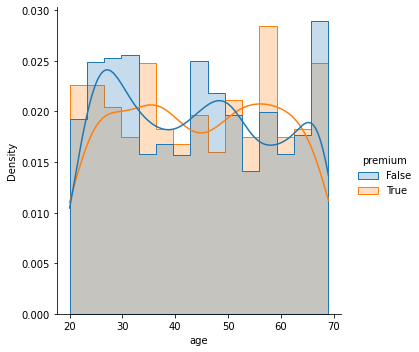

In [23]:
ax = sns.displot(
    joined_user_data, x="age", hue="premium", element="step",
    stat="density", common_norm=False, kde=True
)

In [24]:
ax.savefig('graph.png')

In [53]:
users_success

36165    41
61468    41
12179    41
61473    41
78349    41
         ..
36194     1
57752     1
84618     1
53228     1
36864     1
Name: successful_operations, Length: 2845, dtype: int64

In [54]:
users_success_df = pd.DataFrame(users_success)\
.reset_index()\
.rename(columns={'index':'client'})
users_success_df.head(20)

,client,successful_operations
0,36165,41
1,61468,41
2,12179,41
3,61473,41
4,78349,41
5,28719,41
6,92584,41
7,52870,41
8,82563,41
9,64064,40


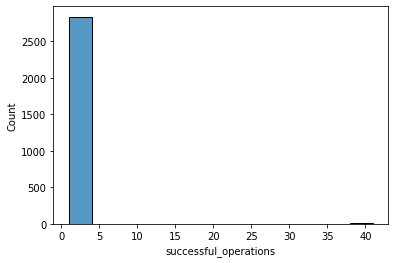

In [55]:
sns.histplot(users_success_df, x="successful_operations")

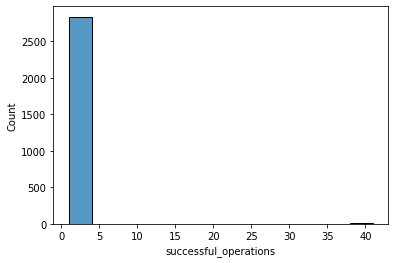

In [56]:
sns.histplot(users_success)

In [61]:
age_computer_success = joined_user_data\
                    .dropna(subset=['age','platform'])\
                    .query('platform == "computer"')

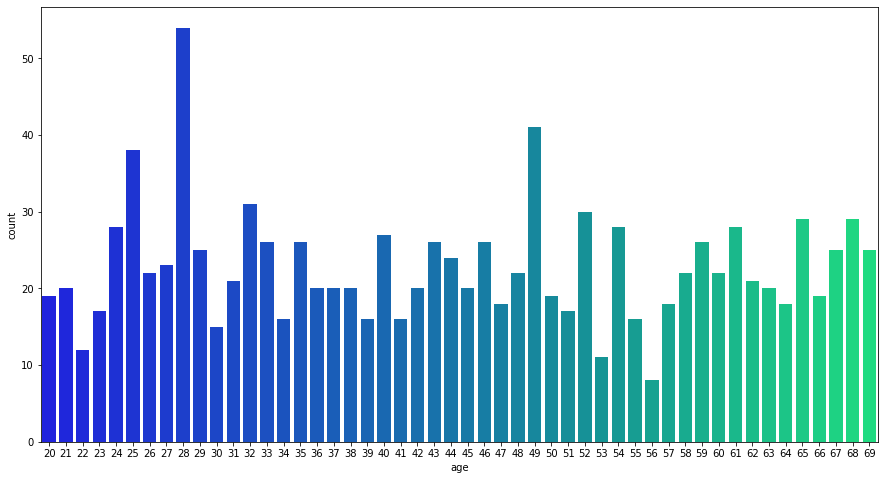

In [83]:
plt.figure(figsize=(15,8))
sns.countplot(x='age', data=age_computer_success, palette='winter')